In [108]:
import pymolpro
import pandas as pd

In [109]:
backend = 'local' 
project_name = 'BHDIV10_methodtest'
parallel = 8

In [110]:
methods = {"HF": "hf",
"MP2": "mp2",
"MP3": "mp3",
"MP4": "mp4",
"PAPT2":"PAPT;MP2",
"PAPT3":"PAPT;MP3",
"PAPT4":"PAPT;MP4",
"CCSD":"CCSD",
"CCSD(T)":"CCSD(T)" }
bases = ['cc-pVDZ','cc-pVTZ']

In [111]:
db = pymolpro.database.load("GMTKN55_BHDIV10")

In [112]:
small=db.subset(open_shell=False,max_electrons=30)
print(small)

GMTKN55 BHDIV10 (closed shell only) (maximum number of electrons 30):

Molecules:
ts5: {'geometry': '10\n  \n B     0.0000000    0.0000000   -2.3759884 \n H     0.5905364    1.0228391   -2.5936411 \n H     0.5905364   -1.0228391   -2.5936411 \n H    -1.1810728    0.0000000   -2.5936411 \n P    -0.0000000    0.0000000    1.7684168 \n H     0.6165007    1.0678105    2.4225352 \n H     0.6165007   -1.0678105    2.4225352 \n H    -1.2330014    0.0000000    2.4225352 \n H     0.0000000    0.0000000   -1.0070281 \n H    -0.0000000    0.0000000   -0.1475438 \n', 'description': 'ts5'}
ts4: {'geometry': '11\n  \n C    -0.2859289    0.9184703    1.0736652 \n C    -0.4034021   -0.6529505   -0.3445861 \n C     0.7266145   -0.7363334   -1.2029949 \n H    -0.1370899    1.9111760    0.6466858 \n H     0.4520114    0.7052124    1.8459804 \n H     0.4779536    0.2142783   -0.1301686 \n H    -1.2954707    0.8256305    1.4690274 \n H    -1.3320510   -0.2613236   -0.7376201 \n H    -0.5171754   -1.3832741

In [113]:
results = {}
for method in methods:
    results[method] = {}
    for basis in bases:
        results[method][basis] = pymolpro.database.run(small, methods[method], basis, location=project_name,
                                                       backend=backend,
                                                       preamble="core,small", parallel=parallel)
        if results[method][basis].failed: print(method, basis, 'failed', results[method][basis].project_directory)
        
print(results)       

{'HF': {'cc-pVDZ': <pymolpro.database.Database object at 0x7f2f9ee9bf10>, 'cc-pVTZ': <pymolpro.database.Database object at 0x7f2f9edee170>}, 'MP2': {'cc-pVDZ': <pymolpro.database.Database object at 0x7f2f9e7c1bd0>, 'cc-pVTZ': <pymolpro.database.Database object at 0x7f2f9edeeb30>}, 'MP3': {'cc-pVDZ': <pymolpro.database.Database object at 0x7f2f9ee9a650>, 'cc-pVTZ': <pymolpro.database.Database object at 0x7f2f9e5e05e0>}, 'MP4': {'cc-pVDZ': <pymolpro.database.Database object at 0x7f2f9f120d90>, 'cc-pVTZ': <pymolpro.database.Database object at 0x7f2f9e843190>}, 'PAPT2': {'cc-pVDZ': <pymolpro.database.Database object at 0x7f2f9e843850>, 'cc-pVTZ': <pymolpro.database.Database object at 0x7f302d1323e0>}, 'PAPT3': {'cc-pVDZ': <pymolpro.database.Database object at 0x7f2f9e3234c0>, 'cc-pVTZ': <pymolpro.database.Database object at 0x7f304c6543d0>}, 'PAPT4': {'cc-pVDZ': <pymolpro.database.Database object at 0x7f30655d2230>, 'cc-pVTZ': <pymolpro.database.Database object at 0x7f30655d24a0>}, 'CCSD':

In [114]:
analyse=pymolpro.database.analyse([result['cc-pVTZ'] for result in results.values()],small)
analyse['reaction statistics']

,HF/cc-pVTZ,MP2/cc-pVTZ,MP3/cc-pVTZ,MP4/cc-pVTZ,PAPT;MP2/cc-pVTZ,PAPT;MP3/cc-pVTZ,PAPT;MP4/cc-pVTZ,CCSD/cc-pVTZ,CCSD(T)/cc-pVTZ
MAD,0.019471,0.004558,0.003433,0.002391,0.003533,0.003664,0.001654,0.004123,0.001688
MAXD,0.036320,0.007710,0.005642,0.003798,0.007188,0.007417,0.002744,0.007807,0.002024
RMSD,0.024249,0.005081,0.003865,0.002702,0.004506,0.004618,0.001896,0.005001,0.001744
MSD,0.018789,0.000582,0.002568,0.000141,0.003533,0.003664,-0.000176,0.004123,0.000339
STDEVD,0.018776,0.006182,0.003537,0.003305,0.003426,0.003443,0.002312,0.003467,0.002096


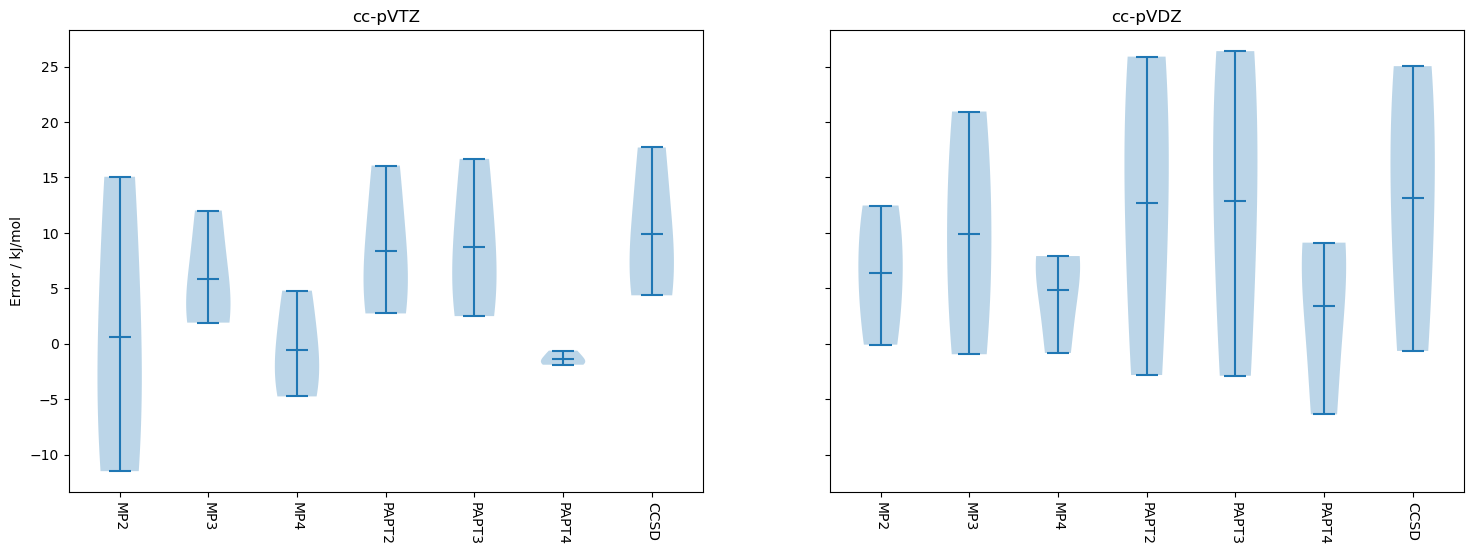

In [122]:
import matplotlib.pyplot as plt

methods_pruned = [method for method in methods if (method != 'HF') and (method != 'CCSD(T)')]
bases_pruned = ['cc-pVTZ', 'cc-pVDZ']
fig, panes = plt.subplots(nrows=1, ncols=len(bases_pruned), sharey=True, figsize=(18, 6))

for pane in range(len(bases_pruned)):
    data = []
    for method in methods_pruned:
        data.append(
            pymolpro.database.analyse(results[method][bases_pruned[pane]],
                                      results['CCSD(T)']['cc-pVTZ'],'kJ/mol')['reaction energy deviations'].to_numpy()[:, 0]
        )
    panes[pane].violinplot(data, showmeans=True, showextrema=True, vert=True, bw_method='silverman')
    panes[pane].set_xticks(range(1, len(methods_pruned) + 1), labels=methods_pruned, rotation=-90)
    panes[pane].set_title(bases_pruned[pane])
panes[0].set_ylabel('Error / kJ/mol')
plt.savefig(project_name + ".violin.pdf")
df = pd.DataFrame(data)
df.to_excel("PAPT.xlsx")

In [117]:
extrapolate=pymolpro.database.basis_extrapolate(results[method].values(), results["HF"].values())
extrapolate

In [ ]:
data[-1]

In [31]:
error_table=pymolpro.database.analyse(results['PAPT;MP2']['cc-pVTZ'],results['CCSD(T)']['cc-pVTZ'],'kJ/mol')['reaction energy deviations']
error_table

,PAPT;MP2/cc-pVTZ
4,16.074325
5,6.365416
10,2.733909


In [37]:
key_max=error_table['PAPT;MP2/cc-pVTZ'].idxmax()
key_max

'4'

In [32]:
pymolpro.database.analyse(results['PAPT;MP2']['cc-pVTZ'],results['CCSD(T)']['cc-pVTZ'],'kJ/mol')

{'reaction energies':     PAPT;MP2/cc-pVTZ
 4         421.248022
 5          67.696341
 10        279.582580,
 'reaction energy deviations':     PAPT;MP2/cc-pVTZ
 4          16.074325
 5           6.365416
 10          2.733909,
 'reaction statistics':         PAPT;MP2/cc-pVTZ
 MAD             8.391217
 MAXD           16.074325
 RMSD           10.105720
 MSD             8.391217
 STDEVD          6.897070,
 'molecule energies':       PAPT;MP2/cc-pVTZ
 ts5     -972564.307807
 ts4     -311775.620698
 ed4     -312196.868721
 ed5     -972632.004148
 ed10    -348008.684205
 ts10    -347729.101625,
 'molecule energy deviations':       PAPT;MP2/cc-pVTZ
 ts5          21.223866
 ts4          60.743016
 ed4          44.668691
 ed5          14.858450
 ed10         62.324754
 ts10         65.058663,
 'molecule statistics':         PAPT;MP2/cc-pVTZ
 MAD            44.812907
 MAXD           65.058663
 RMSD           49.114215
 MSD            44.812907
 STDEVD         22.018433}

In [ ]:
df.loc[df['Value'].idxmax()]